In [16]:
from keras import layers
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


In [5]:
model = VGG16(include_top=False, input_shape=(224,224,3))

In [6]:
for layer in model.layers:
    layer.trainable = False

In [12]:
flatten_layer = layers.Flatten()(model.output)
fully_connected_layer = layers.Dense(512, activation = "relu")(flatten_layer)
output_layer =layers.Dense(1, activation = "sigmoid")(fully_connected_layer)

In [13]:
model = Model(inputs=model.inputs, outputs = output_layer)

In [17]:
model.compile(loss = "binary_crossentropy",
                optimizer = optimizers.RMSprop(learning_rate = 1e-4),
                metrics = ["acc"])

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [19]:
train_datagen_x = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 45,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.3,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     fill_mode = "nearest")

validation_datagen_x = ImageDataGenerator(rescale = 1./255)

In [21]:
train_directory = "catdog/train"
validation_directory = "catdog/validation"

In [22]:
train_generator_x = train_datagen_x.flow_from_directory(train_directory,
                                                        target_size = (224,224),
                                                        batch_size = 16,
                                                        class_mode = "binary")


validation_generator_x = validation_datagen_x.flow_from_directory(train_directory,
                                                                  target_size = (224,224),
                                                                  batch_size = 16,
                                                                  class_mode = "binary")

Found 1999 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [27]:
history_x = model.fit(train_generator_x,
                      validation_data = validation_generator_x,
                      epochs = 5)

print("Info: Done!")

Epoch 1/5
125/125 [==============================] - 587s 5s/step - loss: 0.7260 - acc: 0.6443 - val_loss: 0.4007 - val_acc: 0.8284
Epoch 2/5
125/125 [==============================] - 463s 4s/step - loss: 0.5862 - acc: 0.7044 - val_loss: 0.3574 - val_acc: 0.8429
Epoch 3/5
125/125 [==============================] - 460s 4s/step - loss: 0.5299 - acc: 0.7364 - val_loss: 0.3593 - val_acc: 0.8419
Epoch 4/5
125/125 [==============================] - 463s 4s/step - loss: 0.4950 - acc: 0.7599 - val_loss: 0.3298 - val_acc: 0.8574
Epoch 5/5
125/125 [==============================] - 465s 4s/step - loss: 0.4824 - acc: 0.7589 - val_loss: 0.2838 - val_acc: 0.8744
Info: Done!


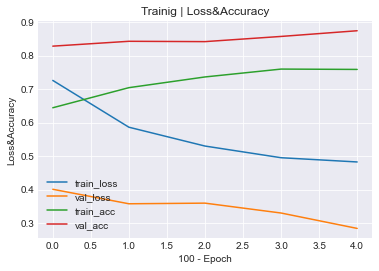

In [29]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("seaborn-darkgrid")
plt.figure()

epochs = 5

plt.plot(np.arange(0,epochs), history_x.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history_x.history["val_loss"], label="val_loss")

plt.plot(np.arange(0,epochs), history_x.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), history_x.history["val_acc"], label="val_acc")

plt.title("Trainig | Loss&Accuracy")

plt.xlabel("100 - Epoch")
plt.ylabel("Loss&Accuracy")

plt.legend(loc="lower left")

In [30]:
model.save("models/cat_dog_transfer_learning.h5")

In [31]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [32]:
model_path = "models/cat_dog_transfer_learning.h5"
image_path = "catdog/test/cats/1513.jpg"

In [36]:
prediction_model = load_model(model_path)
test_img = load_img(image_path, target_size=(224,224))

<PIL.Image.Image image mode=RGB size=224x224 at 0x1A600A6AB88>


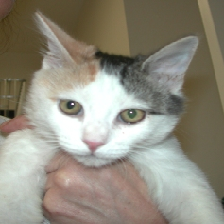

In [37]:
print(test_img)
test_img

In [38]:
test_img = img_to_array(test_img)
test_img.shape


(224, 224, 3)

In [39]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 224, 224, 3)

In [40]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [41]:
result = prediction_model.predict(test_img)
result

array([[0.]], dtype=float32)

In [42]:
if result[0][0] > 0.5:
    label = "Dog"
    print("Prediction: This is a",label)
    
else:
    label = "Cat"
    print("Prediction: This is a", label)

Prediction: This is a Cat


In [43]:
import cv2

test_img = cv2.imread(image_path)


font = cv2.FONT_HERSHEY_SIMPLEX
color = (255,255,0)
cv2.putText(test_img, label, (20,40), font, 1.0, color, 3)


cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()